Import Libraries

In [ ]:
"For unit testing"
import unittest

In [ ]:
'Import necessary Libraries and load the dataset'
import pandas as pd
'copy of the data in my drive'
data='/content/drive/MyDrive/specimenDate_ageDemographic-unstacked.csv'   
import matplotlib.pyplot as plt
df=pd.read_csv(data)
df.head(2)


,areaType,areaCode,areaName,date,newCasesBySpecimenDate-0_4,newCasesBySpecimenDate-0_59,newCasesBySpecimenDate-10_14,newCasesBySpecimenDate-15_19,newCasesBySpecimenDate-20_24,newCasesBySpecimenDate-25_29,newCasesBySpecimenDate-30_34,newCasesBySpecimenDate-35_39,newCasesBySpecimenDate-40_44,newCasesBySpecimenDate-45_49,newCasesBySpecimenDate-50_54,newCasesBySpecimenDate-55_59,newCasesBySpecimenDate-5_9,newCasesBySpecimenDate-60+,newCasesBySpecimenDate-60_64,newCasesBySpecimenDate-65_69,newCasesBySpecimenDate-70_74,newCasesBySpecimenDate-75_79,newCasesBySpecimenDate-80_84,newCasesBySpecimenDate-85_89,newCasesBySpecimenDate-90+,newCasesBySpecimenDate-unassigned,newCasesBySpecimenDateRollingRate-0_4,newCasesBySpecimenDateRollingRate-0_59,newCasesBySpecimenDateRollingRate-10_14,newCasesBySpecimenDateRollingRate-15_19,newCasesBySpecimenDateRollingRate-20_24,newCasesBySpecimenDateRollingRate-25_29,newCasesBySpecimenDateRollingRate-30_34,newCasesBySpecimenDateRollingRate-35_39,newCasesBySpecimenDateRollingRate-40_44,newCasesBySpecimenDateRollingRate-45_49,newCasesBySpecimenDateRollingRate-50_54,newCasesBySpecimenDateRollingRate-55_59,newCasesBySpecimenDateRollingRate-5_9,newCasesBySpecimenDateRollingRate-60+,newCasesBySpecimenDateRollingRate-60_64,newCasesBySpecimenDateRollingRate-65_69,newCasesBySpecimenDateRollingRate-70_74,newCasesBySpecimenDateRollingRate-75_79,newCasesBySpecimenDateRollingRate-80_84,newCasesBySpecimenDateRollingRate-85_89,newCasesBySpecimenDateRollingRate-90+,newCasesBySpecimenDateRollingSum-0_4,newCasesBySpecimenDateRollingSum-0_59,newCasesBySpecimenDateRollingSum-10_14,newCasesBySpecimenDateRollingSum-15_19,newCasesBySpecimenDateRollingSum-20_24,newCasesBySpecimenDateRollingSum-25_29,newCasesBySpecimenDateRollingSum-30_34,newCasesBySpecimenDateRollingSum-35_39,newCasesBySpecimenDateRollingSum-40_44,newCasesBySpecimenDateRollingSum-45_49,newCasesBySpecimenDateRollingSum-50_54,newCasesBySpecimenDateRollingSum-55_59,newCasesBySpecimenDateRollingSum-5_9,newCasesBySpecimenDateRollingSum-60+,newCasesBySpecimenDateRollingSum-60_64,newCasesBySpecimenDateRollingSum-65_69,newCasesBySpecimenDateRollingSum-70_74,newCasesBySpecimenDateRollingSum-75_79,newCasesBySpecimenDateRollingSum-80_84,newCasesBySpecimenDateRollingSum-85_89,newCasesBySpecimenDateRollingSum-90+,newCasesBySpecimenDateRollingSum-unassigned
0,ltla,E06000001,Hartlepool,2020-03-16,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ltla,E06000001,Hartlepool,2020-03-17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Extracting unique columns within the dataframe

In [ ]:
df_unique=df[['areaName','date','newCasesBySpecimenDate-0_59', 'newCasesBySpecimenDate-60+', 'newCasesBySpecimenDateRollingRate-0_59',
       'newCasesBySpecimenDateRollingRate-60+', 'newCasesBySpecimenDateRollingSum-0_59', 'newCasesBySpecimenDateRollingSum-60+' ]]

# Visualizations by newCasesBySpecimenDate-

**PROCESSING**

First extract the unique columns based on newCasesBySpecimenDate- which is the column newCasesBySpecimenDate-0_59 and newCasesBySpecimenDate-60+, the addition of this two columns give the total number of cases per day 

In [ ]:
newCasesBySpecimenDate=df[['areaName','date','newCasesBySpecimenDate-0_59', 'newCasesBySpecimenDate-60+']]
newCasesBySpecimenDate['Total cases']=newCasesBySpecimenDate.sum(axis=1)

'Respective Months and Week can also be Extracted for the newCasesBySpecimenDate df'
newCasesBySpecimenDate['date']=newCasesBySpecimenDate['date'].astype('datetime64[ns]')
newCasesBySpecimenDate['months']=newCasesBySpecimenDate['date'].dt.month
newCasesBySpecimenDate['weeks']=newCasesBySpecimenDate['date'].dt.week


In [ ]:
newCasesBySpecimenDate.head(2)

,areaName,date,newCasesBySpecimenDate-0_59,newCasesBySpecimenDate-60+,Total cases,months,weeks
0,Hartlepool,2020-03-16,0,1,1,3,12
1,Hartlepool,2020-03-17,0,0,0,3,12


Total number of cases in each area from 2020-03-16 to 2020-11-01, the entire timeframe period of the whole dataset

In [ ]:
def plot1():
  newCasesBySpecimenDate.groupby('areaName')['Total cases'].sum().to_frame().plot(kind='line', figsize=(15,8) )
  plt.xlabel('AreaName')
  plt.ylabel('Total cases')
  plt.title('Total number of cases in each area from 2020-03-16 to 2020-11-01')


.
----------------------------------------------------------------------
Ran 1 test in 0.123s

OK


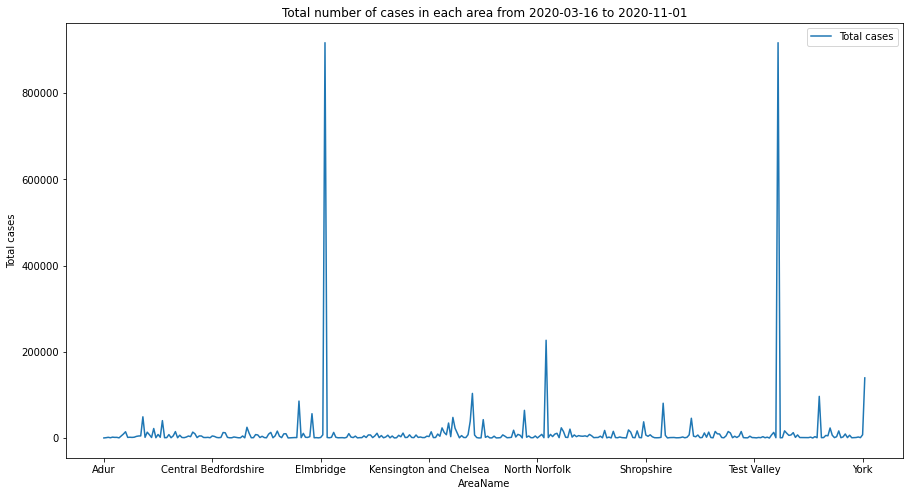

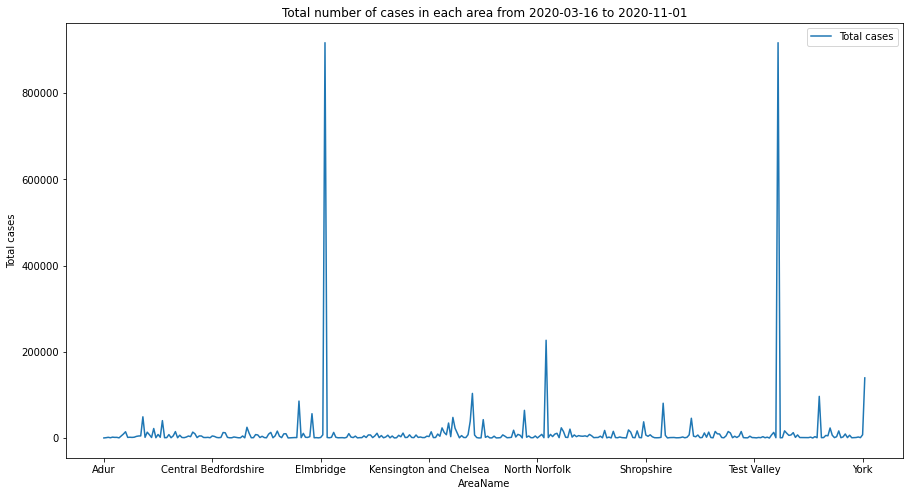

In [ ]:
'Unit testing'
class TestSqrCurve(unittest.TestCase):
    def test_plot(self):
        assert plot1() is plot1()
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

Top 10 Areas with the highest number of cases from 2020-03-16 to 2020-11-01, the entire timeframe period of the whole dataset

In [ ]:
def plot2():
  newCasesBySpecimenDate.groupby('areaName')['Total cases'].sum().to_frame().\
  sort_values('Total cases', ascending=False).head(10).plot(kind='bar', figsize=(15,8))
  plt.xlabel('AreaName')
  plt.ylabel('Total cases')
  plt.title('Top 10 Areas with the highest number of cases from 2020-03-16 to 2020-11-01')


.
----------------------------------------------------------------------
Ran 1 test in 0.106s

OK


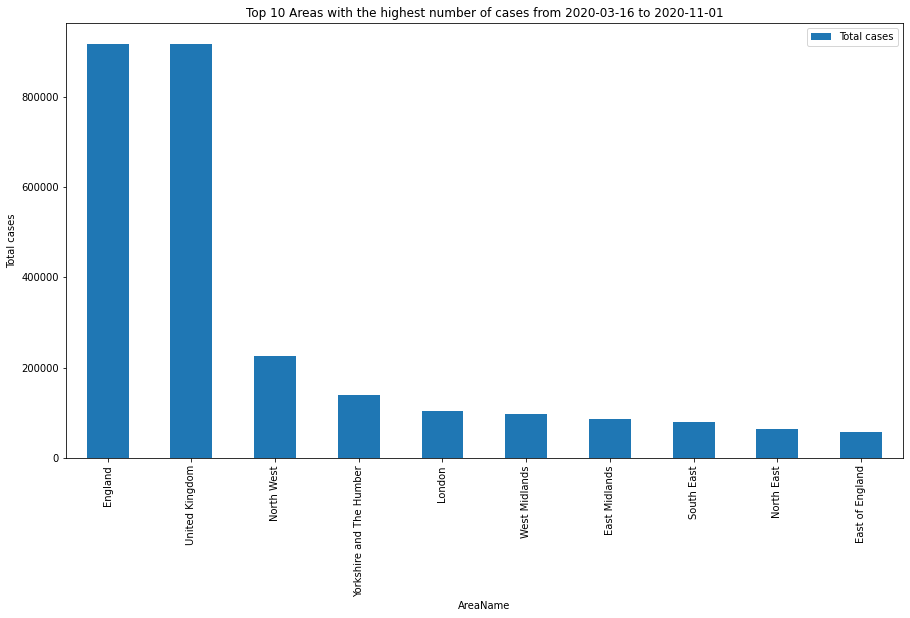

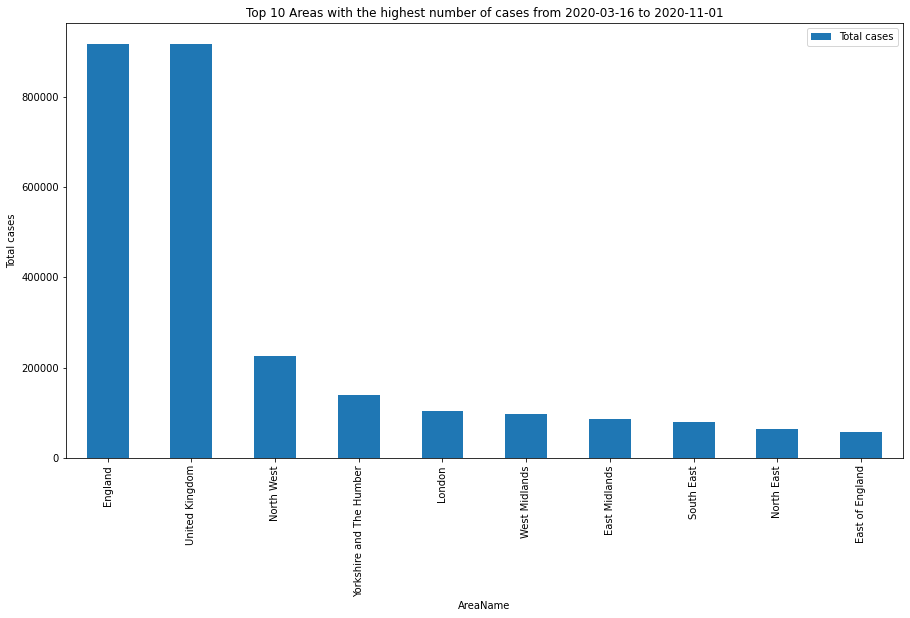

In [ ]:
'Unit testing'
class TestSqrCurve(unittest.TestCase):
    def test_plot(self):
        assert plot2() is plot2()
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

Top 10 Areas with the lowest number of cases from 2020-03-16 to 2020-11-01, the entire timeframe period of the whole dataset

In [ ]:
def plot3():
  newCasesBySpecimenDate.groupby('areaName')['Total cases'].sum().to_frame().\
  sort_values('Total cases', ascending=False).tail(10).\
  plot(kind='bar', figsize=(15,8))

  plt.xlabel('AreaName')
  plt.ylabel('Total cases')
  plt.title('Top 10 Areas with the lowest of cases from 2020-03-16 to 2020-11-01')




.
----------------------------------------------------------------------
Ran 1 test in 0.116s

OK


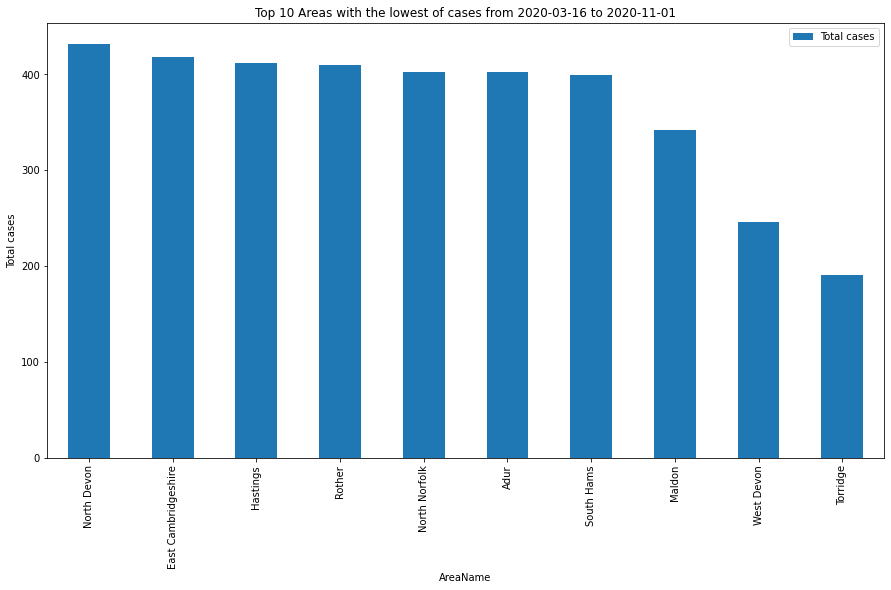

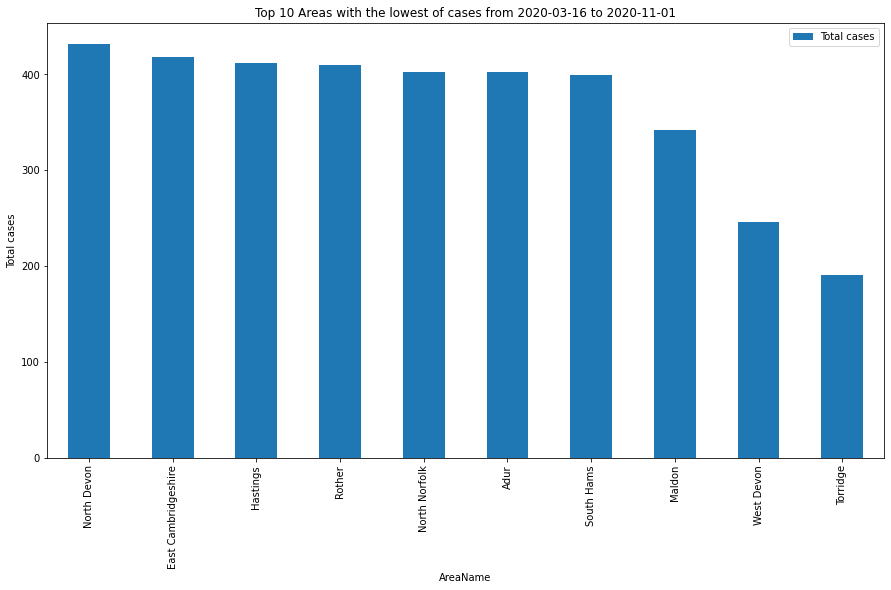

In [ ]:
'Unit testing'
class TestSqrCurve(unittest.TestCase):
    def test_plot(self):
        assert plot3() is plot3()
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

Pie chart showing Comparison of Total cases per month

In [ ]:
def plot4():
  newCasesBySpecimenDate.groupby('months')['Total cases'].sum().to_frame().plot(kind='pie',y='Total cases',autopct='%1.1f%%',figsize=(20,9) )
  plt.title('Pie chart showing Comparison of Total cases per month')


.
----------------------------------------------------------------------
Ran 1 test in 0.117s

OK


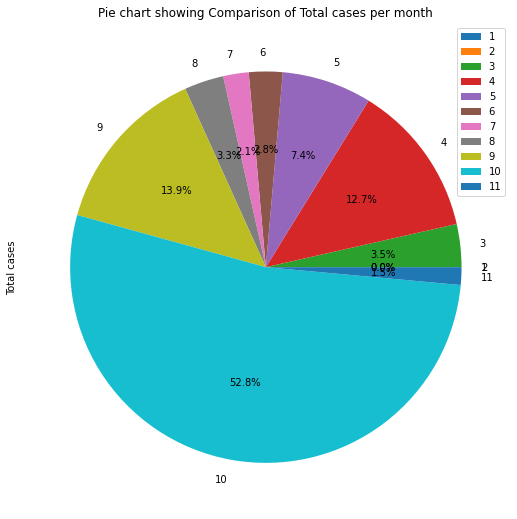

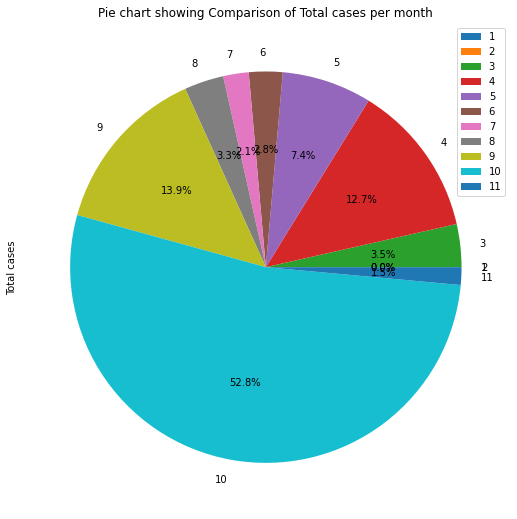

In [ ]:
'Unit testing'
class TestSqrCurve(unittest.TestCase):
    def test_plot(self):
        assert plot4() is plot4()
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

Grouped Bar chart showing trends for Total newCases of people below age 59 and Total newCases of people above age 60 per month

In [ ]:
def plot4():
  newCasesBySpecimenDate.groupby('months').sum()[['newCasesBySpecimenDate-0_59',	'newCasesBySpecimenDate-60+']].plot(kind='bar',figsize=(15,8) )
  plt.xlabel('Months')
  plt.ylabel('Total cases')
  plt.title('Total newCases of people below age 59 and Total newCases of people above age 60 per month')


.
----------------------------------------------------------------------
Ran 1 test in 0.127s

OK


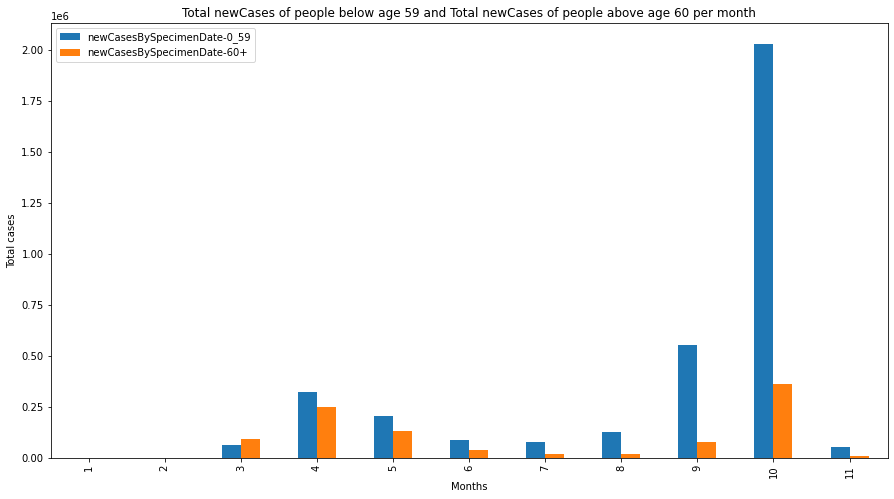

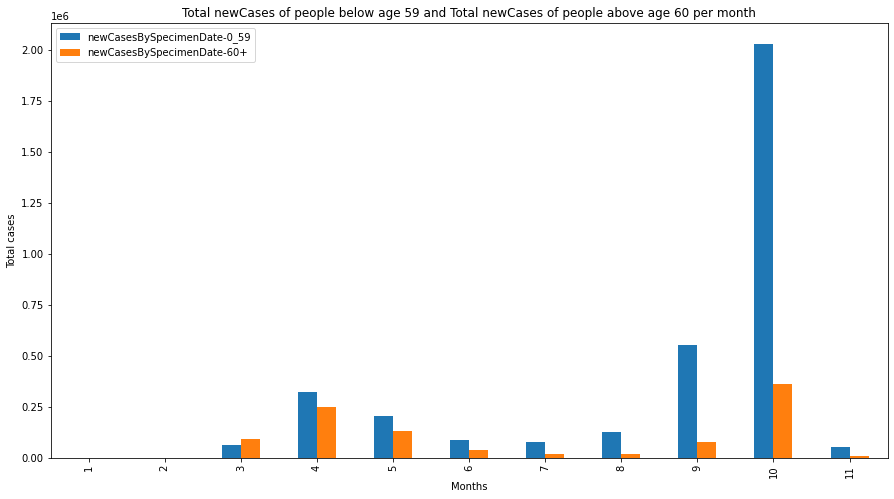

In [ ]:
'Unit testing'
class TestSqrCurve(unittest.TestCase):
    def test_plot(self):
        assert plot4() is plot4()
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

Donut chart showing comparison of total cases of people between age 0-59 and people above 60

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

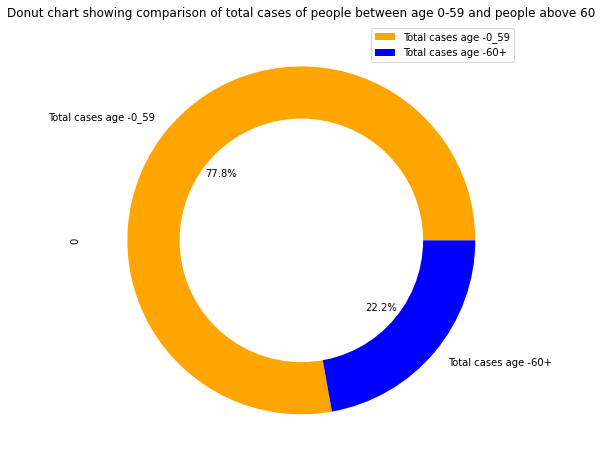

In [ ]:
colors=['#FFA500', '#0000FF']
labels=['Total cases age -0_59', 'Total cases age -60+']

newCasesBySpecimenDate.sum().to_frame().reset_index().drop([0,3, 4, 5]).set_index('index').plot(kind='pie', y=0, colors=colors, labels=labels,autopct='%1.1f%%',figsize=(15,8))
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)


plt.title('Donut chart showing comparison of total cases of people between age 0-59 and people above 60')




Total number of cases reported each day from 2020-02 to 2020-11

In [ ]:
def plot5():
  newCasesBySpecimenDate[['date', 'Total cases']].set_index('date').plot(kind='line',figsize=(15,8))

  plt.xlabel('Dates')
  plt.ylabel('Total cases')
  plt.title('Total number of cases reported each day from 2020-02 to 2020-11')



.
----------------------------------------------------------------------
Ran 1 test in 0.321s

OK


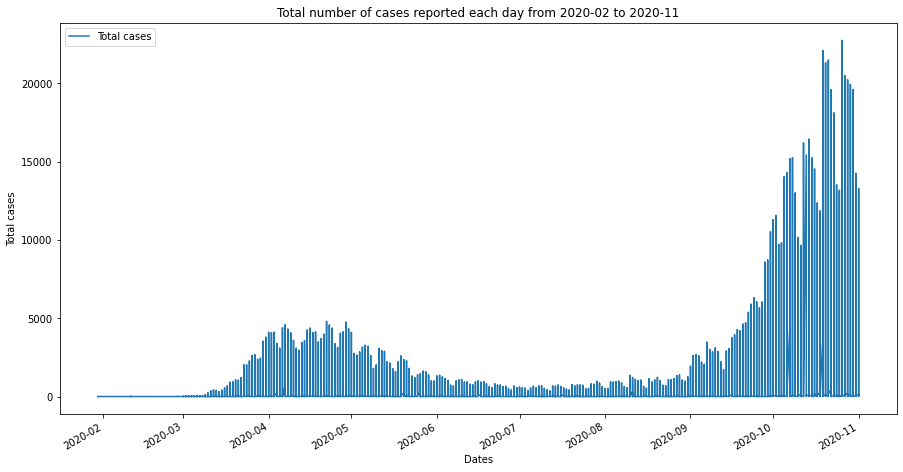

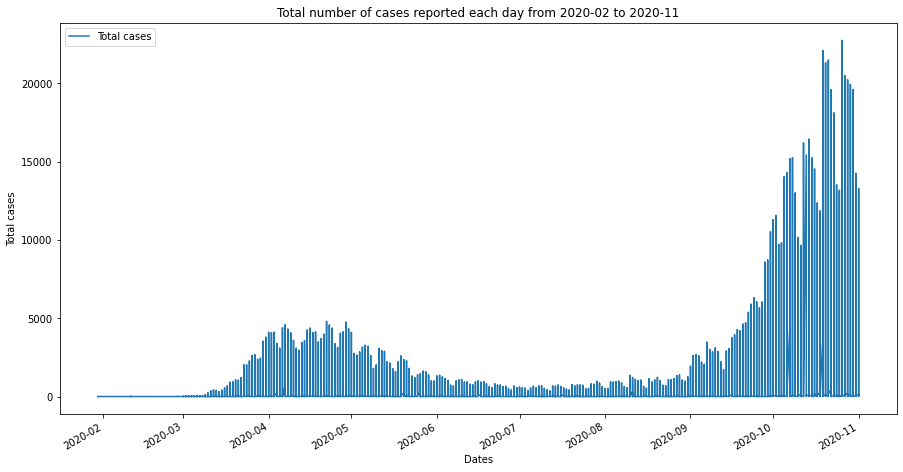

In [ ]:
'Unit testing'
class TestSqrCurve(unittest.TestCase):
    def test_plot(self):
        assert plot5() is plot5()
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

Top 5 Areas with the highest number of cases on 2020-10-26 the day with highest recorded case 

In [ ]:
'Day with the highest number of cases'
newCasesBySpecimenDate[['date', 'Total cases']].set_index('date').idxmax()  


Total cases   2020-10-26
dtype: datetime64[ns]

In [ ]:
def plot6():
  newCasesBySpecimenDate[newCasesBySpecimenDate['date']=='2020-10-26'].   \
  groupby('areaName')['Total cases'].sum().to_frame().reset_index().sort_values('Total cases', ascending=False)   \
  .set_index('areaName').head(5).plot(kind='barh', figsize=(10,7))

  plt.xlabel('Total cases')
  plt.ylabel('AreaName')
  plt.title('Top 5 Areas with the highest number of cases on 2020-10-26 the day with highest recorded case')


.
----------------------------------------------------------------------
Ran 1 test in 0.081s

OK


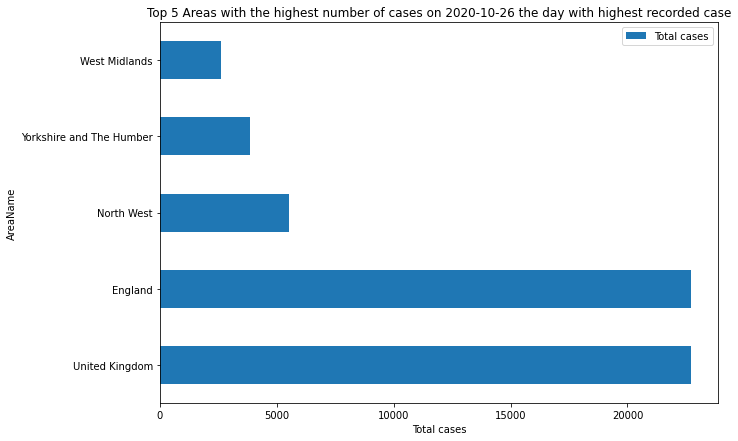

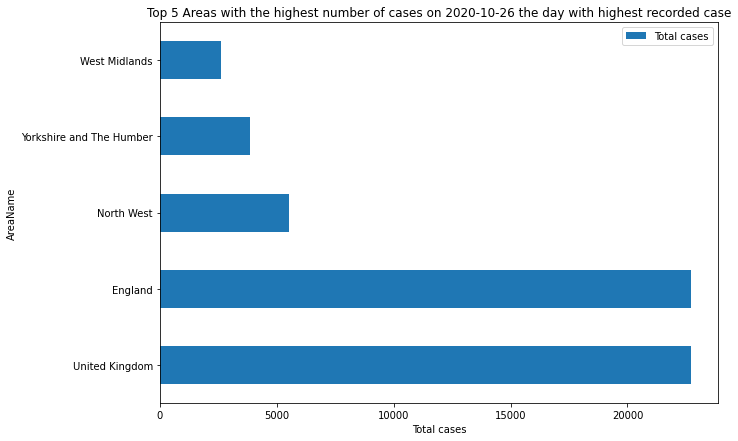

In [ ]:
'Unit testing'
class TestSqrCurve(unittest.TestCase):
    def test_plot(self):
        assert plot6() is plot6()
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

Total number of cases reported each week from from 2020-03-16 to 2020-11-01, the entire timeframe period of the whole dataset

In [ ]:
def plot7():
  newCasesBySpecimenDate.groupby('weeks')['Total cases'].sum().plot(kind='area', figsize=(15,8))
  plt.xlabel('Weeks')
  plt.ylabel('Total cases')
  plt.title('Total number of cases reported each week')


.
----------------------------------------------------------------------
Ran 1 test in 0.055s

OK


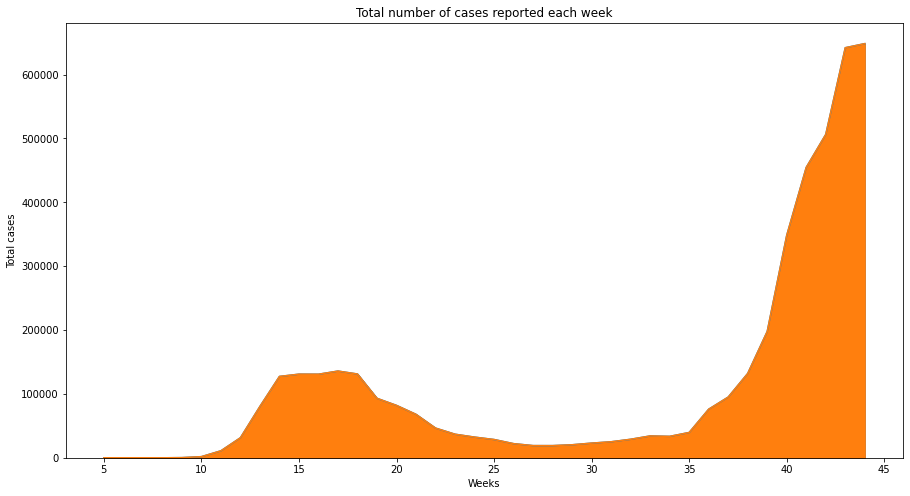

In [ ]:
'Unit testing'
class TestSqrCurve(unittest.TestCase):
    def test_plot(self):
        assert plot7() is plot7()
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

Total number of cases reported each week for People below age 59 and people above age 59 from 2020-03-16 to 2020-11-01, the entire timeframe period of the whole dataset

In [ ]:
def plot8():
  newCasesBySpecimenDate.groupby('weeks')['newCasesBySpecimenDate-0_59', 'newCasesBySpecimenDate-60+' ].sum().plot(kind='area', figsize=(15,8))
  plt.xlabel('Weeks')
  plt.ylabel('Total cases')
  plt.title('Total number of cases reported each week for People below age 59 and people above age 59')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
.
----------------------------------------------------------------------
Ran 1 test in 0.103s

OK


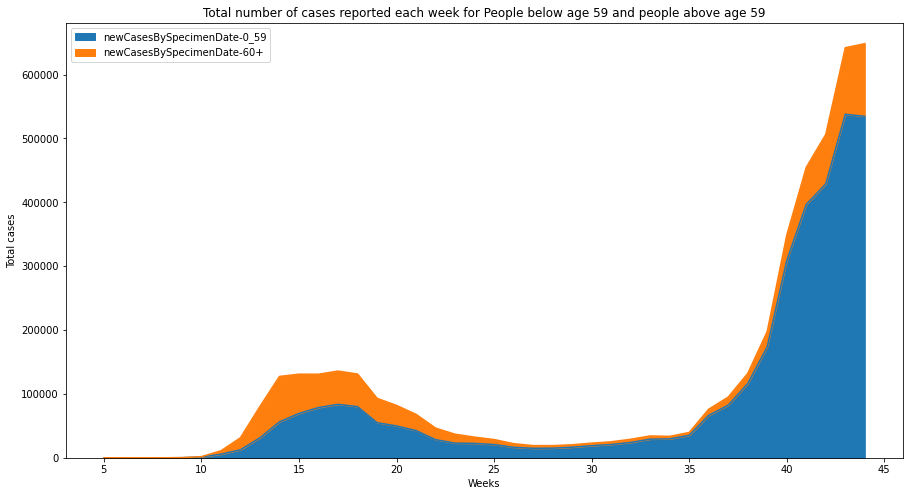

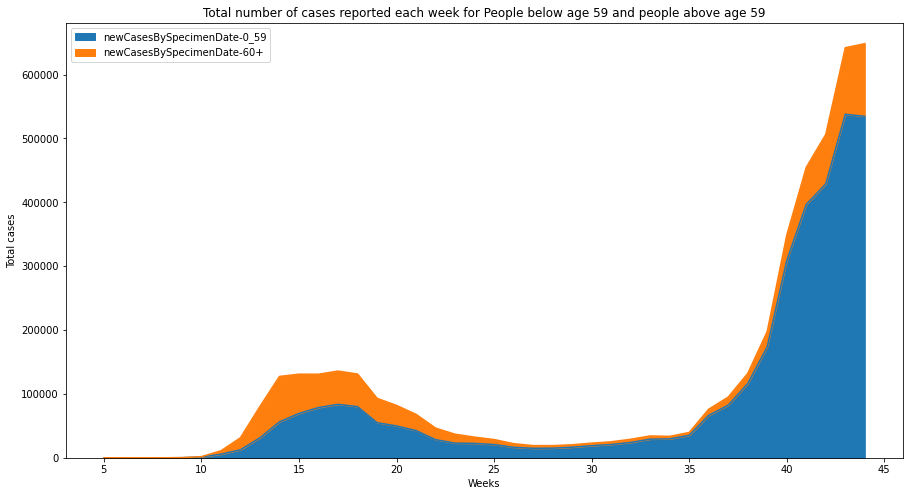

In [ ]:
'Unit testing'
class TestSqrCurve(unittest.TestCase):
    def test_plot(self):
        assert plot8() is plot8()
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

# Visualizations across different age group

Extract dataframe of cases across the respective age groups

In [ ]:
df_age_groups=df[['areaName',	'date',	'newCasesBySpecimenDate-0_4', 'newCasesBySpecimenDate-10_14',	'newCasesBySpecimenDate-15_19',
                  'newCasesBySpecimenDate-20_24',	'newCasesBySpecimenDate-25_29',	'newCasesBySpecimenDate-30_34',	'newCasesBySpecimenDate-35_39',
                  'newCasesBySpecimenDate-40_44',	'newCasesBySpecimenDate-45_49',	'newCasesBySpecimenDate-50_54',	'newCasesBySpecimenDate-55_59',
                  'newCasesBySpecimenDate-5_9',	'newCasesBySpecimenDate-60_64',	'newCasesBySpecimenDate-65_69',
                  'newCasesBySpecimenDate-70_74',	'newCasesBySpecimenDate-75_79',	'newCasesBySpecimenDate-80_84',
                  'newCasesBySpecimenDate-85_89',	'newCasesBySpecimenDate-90+' ]]

**PROCESSING**

In [ ]:
'Respective Months and Week can also be Extracted for the df_age_groups'
df_age_groups['date']=df_age_groups['date'].astype('datetime64[ns]')
df_age_groups['months']=df_age_groups['date'].dt.month
df_age_groups['weeks']=df_age_groups['date'].dt.week

In [ ]:
df_age_groups.head(2)

,areaName,date,newCasesBySpecimenDate-0_4,newCasesBySpecimenDate-10_14,newCasesBySpecimenDate-15_19,newCasesBySpecimenDate-20_24,newCasesBySpecimenDate-25_29,newCasesBySpecimenDate-30_34,newCasesBySpecimenDate-35_39,newCasesBySpecimenDate-40_44,newCasesBySpecimenDate-45_49,newCasesBySpecimenDate-50_54,newCasesBySpecimenDate-55_59,newCasesBySpecimenDate-5_9,newCasesBySpecimenDate-60_64,newCasesBySpecimenDate-65_69,newCasesBySpecimenDate-70_74,newCasesBySpecimenDate-75_79,newCasesBySpecimenDate-80_84,newCasesBySpecimenDate-85_89,newCasesBySpecimenDate-90+,months,weeks
0,Hartlepool,2020-03-16,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3,12
1,Hartlepool,2020-03-17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,12


Total Number of cases recorded for each age group from 2020-03-16 to 2020-11-01, the entire timeframe period of the whole dataset

In [ ]:
def plot9():
  df_age_groups.sum().to_frame().drop(['months', 'areaName', 'weeks']).rename(columns={0:'Total cases'})\
  .plot(kind='bar',figsize=(15,8), color='black')

  plt.xlabel('Age-Range')
  plt.ylabel('Total cases')
  plt.title('Total Number of cases recorded for each age group')


.
----------------------------------------------------------------------
Ran 1 test in 23.851s

OK


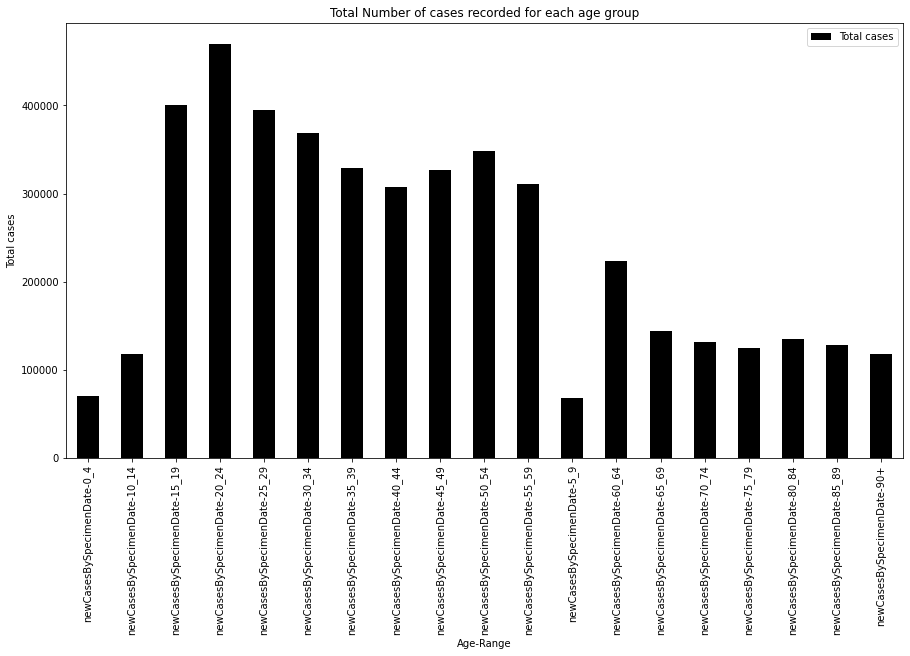

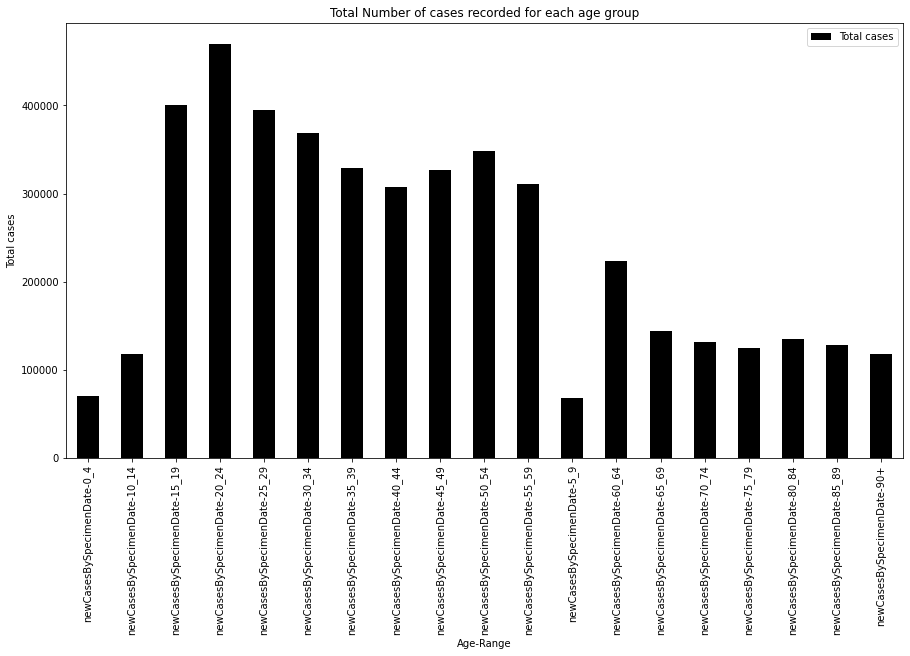

In [ ]:
'Unit testing'
class TestSqrCurve(unittest.TestCase):
    def test_plot(self):
        assert plot9() is plot9()
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

Boxplots showing the distribution counts of Total cases across age groups

In [ ]:
def plot10():
  df_age_groups.drop(['date','months', 'areaName', 'weeks'], axis=1).sum().to_frame().plot(kind='box', figsize=(15,8))


  plt.xlabel('Age-Range')
  plt.ylabel('Total cases')
  plt.title('Boxplots showing the distribution counts of Total cases across age groups')


.
----------------------------------------------------------------------
Ran 1 test in 0.091s

OK


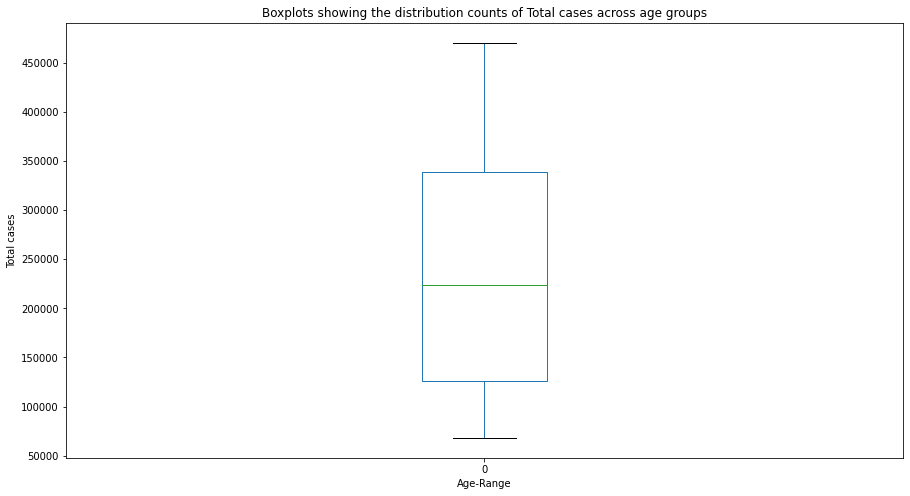

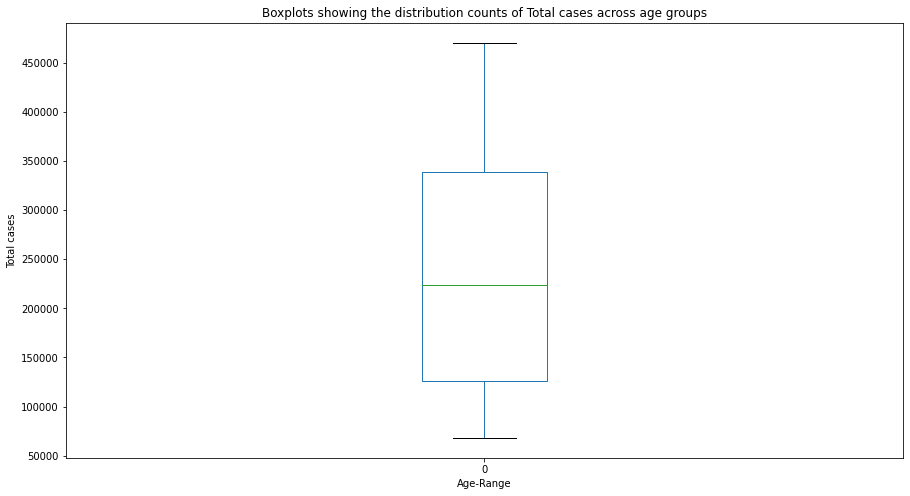

In [ ]:
'Unit testing'
class TestSqrCurve(unittest.TestCase):
    def test_plot(self):
        assert plot10() is plot10()
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

In [ ]:
def plot11():
  df_age_groups.drop(['date','months', 'areaName', 'weeks'], axis=1).plot(kind='box',figsize=(15,8))
  plt.xticks(rotation=90)

  plt.xlabel('Age-Range')
  plt.ylabel('Total cases')
  plt.title('Boxplots of cases recorded for each age group')


.
----------------------------------------------------------------------
Ran 1 test in 0.547s

OK


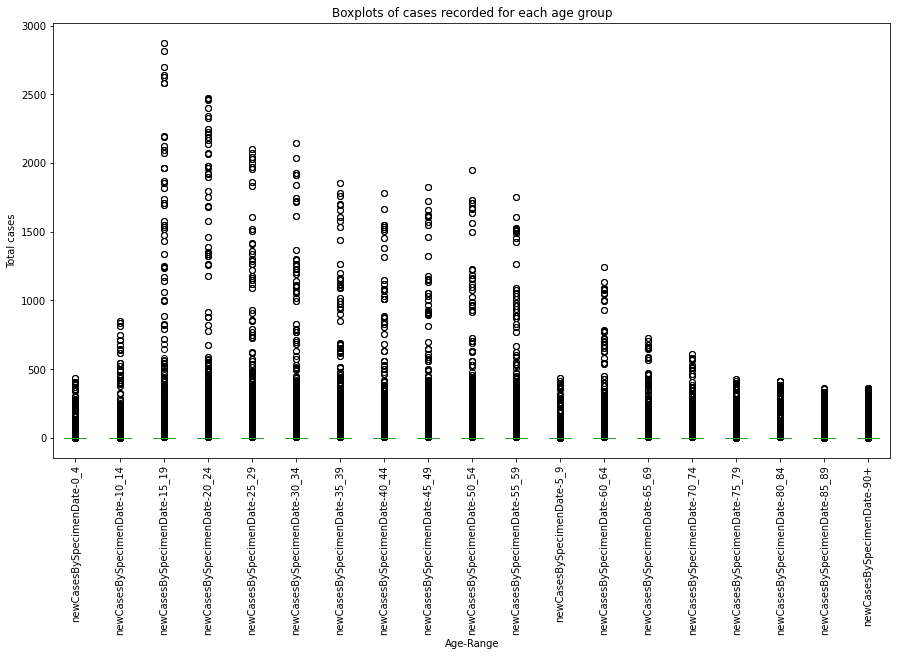

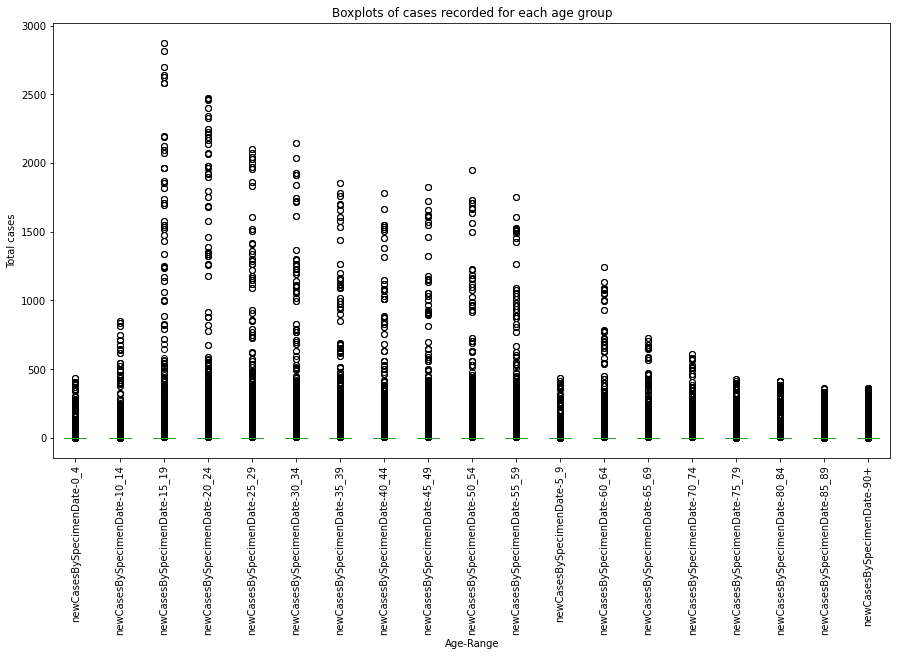

In [ ]:
'Unit testing'
class TestSqrCurve(unittest.TestCase):
    def test_plot(self):
        assert plot11() is plot11()
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

Total Number of Cases recorded for each age group per month

In [ ]:
def plot12():
  df_age_groups.groupby('months').sum().drop('weeks', axis=1).plot(kind='area', figsize=(15,8) )

  plt.xlabel('Months')
  plt.ylabel('Total cases')
  plt.title('Total Number of Cases recorded for each age group per month')


.
----------------------------------------------------------------------
Ran 1 test in 0.200s

OK


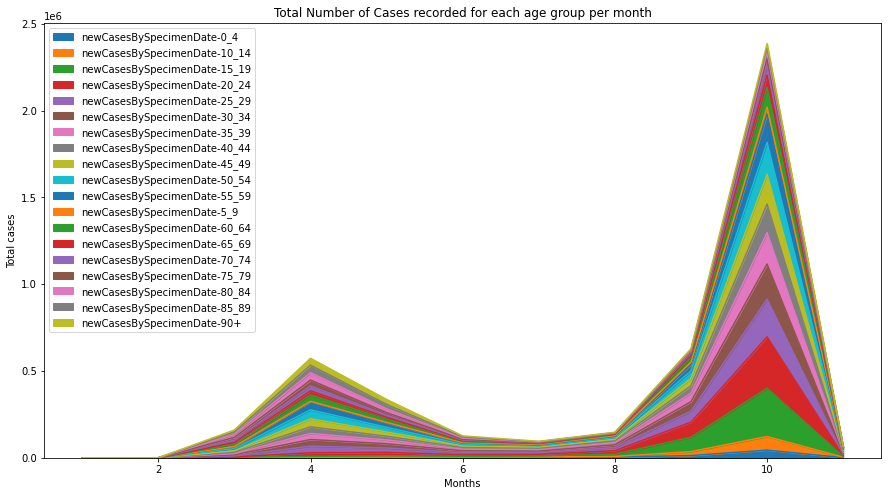

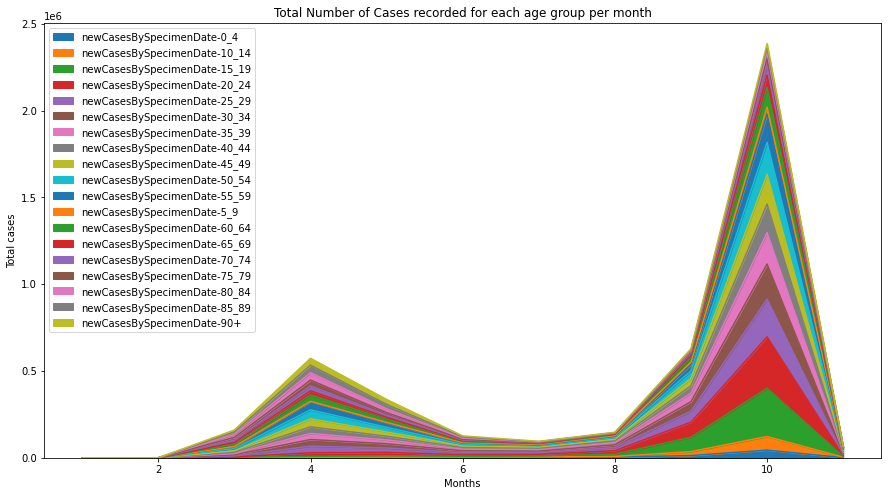

In [ ]:
'Unit testing'
class TestSqrCurve(unittest.TestCase):
    def test_plot(self):
        assert plot12() is plot12()
if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

Proportion of each age group contribution in the Month with the higest case Using a waffle chart

In [ ]:
'The month with highest record of cases is 10-October'
df_age_groups.groupby('months').sum().sum(axis=1).to_frame().idxmax()

0    10
dtype: int64

In [ ]:
df_waffle=df_age_groups.groupby('months').sum().loc[10,:].to_frame().drop('weeks')
df_waffle['perc']=(df_waffle[10]/df_waffle[10].sum()) * 100
df_waffle.reset_index(inplace=True)

In [ ]:
age_groups= ['0_4:','10_14:', '15_19:', '20_24:', '25_29:','30_34:', '35_39:', '40_44:', '45_49:', '50_54:',\
             '55_59:', '5_9:', '60_64:', '65_69:', '70_74:','75_79:', '80_84:', '85_89:', '90:']

In [ ]:
!pip install pywaffle

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

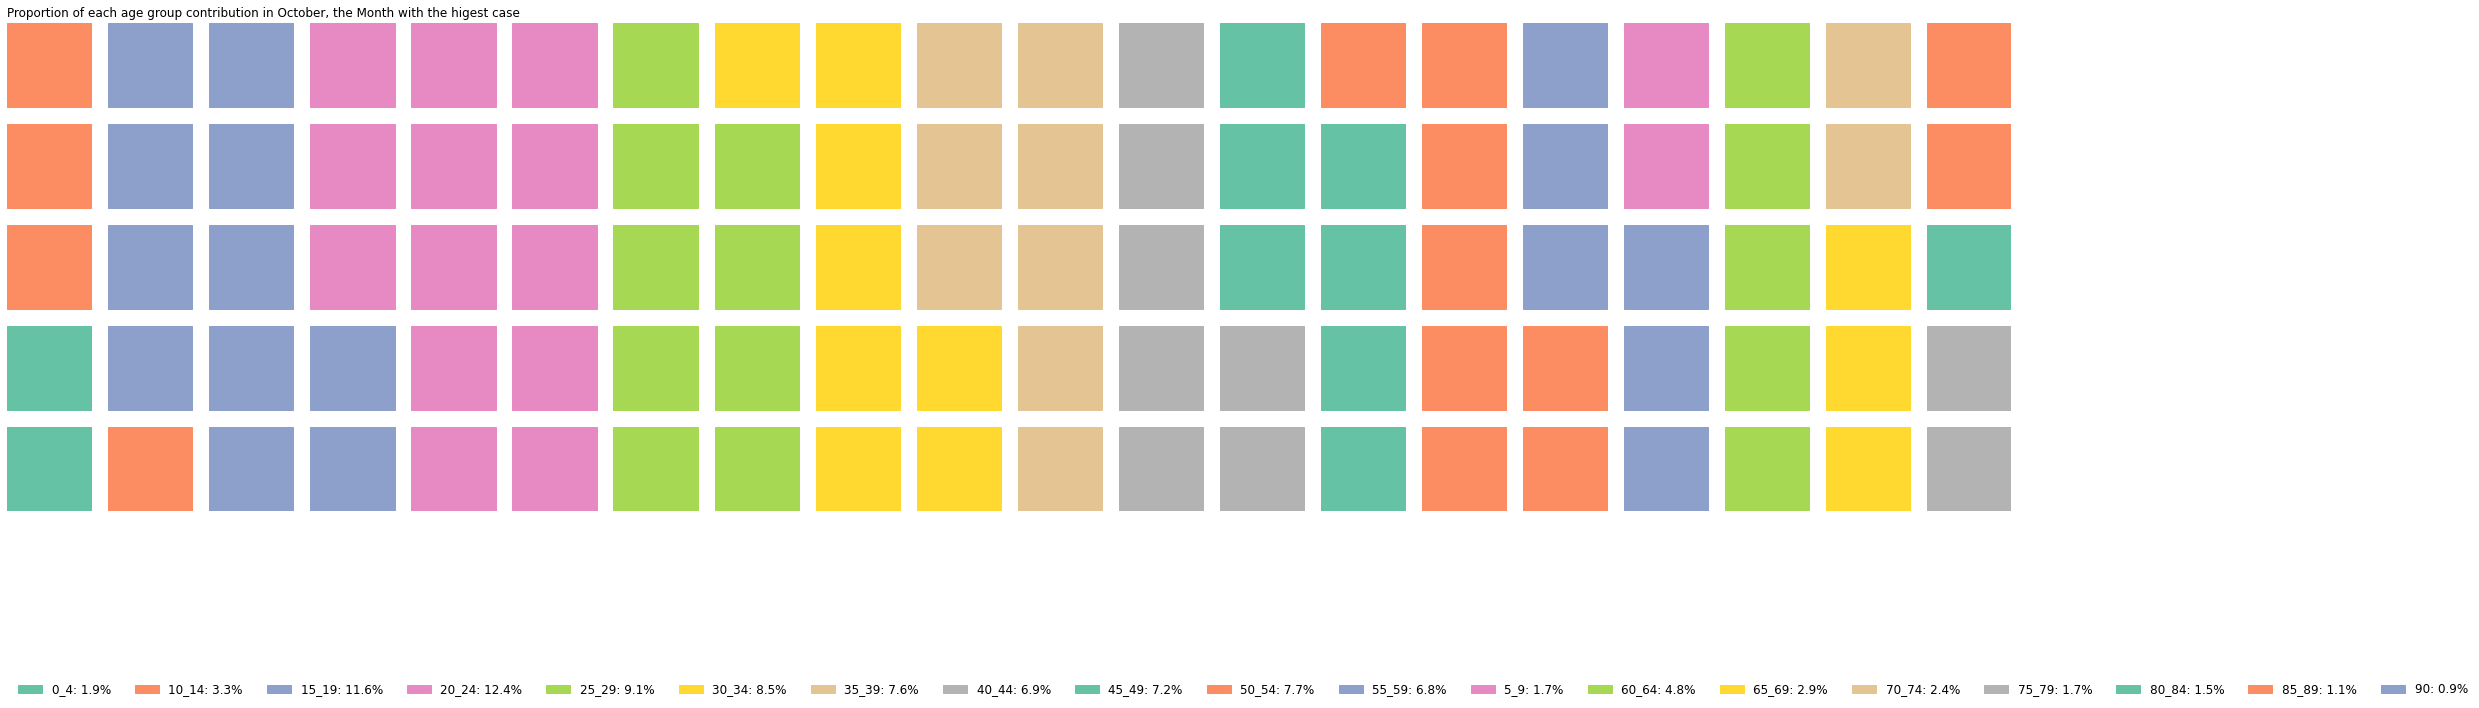

In [ ]:
from pywaffle import Waffle
  

  # To plot the waffle Chart
fig = plt.figure(
    FigureClass = Waffle,
    rows = 5,
    title={'label': 'Proportion of each age group contribution in October, the Month with the higest case', 'loc': 'left'},
    values = df_waffle.perc,
    labels = ['{} {:.1f}%'.format(k, v) for k, v in zip(age_groups,df_waffle.perc)], 
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(df_waffle.perc),'fontsize': 12, 'framealpha': 0},
    figsize=(40,10)
)




# Visualizations By Cumulative Cases

Extraction of Cumulative cases

In [ ]:
df_cum_cases=df[['date','newCasesBySpecimenDateRollingRate-0_4',	'newCasesBySpecimenDateRollingRate-10_14',
                 'newCasesBySpecimenDateRollingRate-15_19',	'newCasesBySpecimenDateRollingRate-20_24',	'newCasesBySpecimenDateRollingRate-25_29',	
                 'newCasesBySpecimenDateRollingRate-30_34',	'newCasesBySpecimenDateRollingRate-35_39',	'newCasesBySpecimenDateRollingRate-40_44',
                 'newCasesBySpecimenDateRollingRate-45_49',	'newCasesBySpecimenDateRollingRate-50_54',	'newCasesBySpecimenDateRollingRate-55_59',	
                 'newCasesBySpecimenDateRollingRate-5_9',		'newCasesBySpecimenDateRollingRate-60_64',
                 'newCasesBySpecimenDateRollingRate-65_69', 'newCasesBySpecimenDateRollingRate-70_74',	'newCasesBySpecimenDateRollingRate-75_79',	
                 'newCasesBySpecimenDateRollingRate-80_84',	'newCasesBySpecimenDateRollingRate-85_89',	'newCasesBySpecimenDateRollingRate-90+'	]]

Cumulative cases per day across age ranges

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

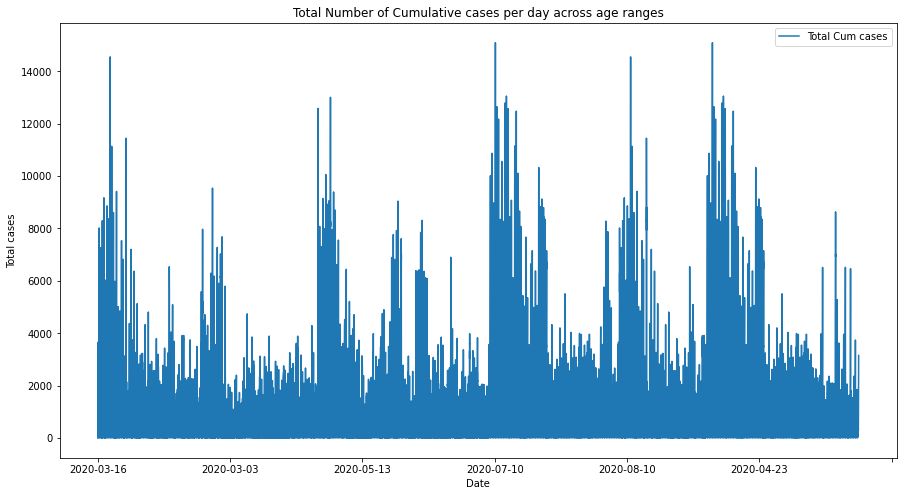

In [ ]:
df_cum_cases['Total Cum cases']=df_cum_cases.sum(axis=1)
df_cum_cases[['date', 'Total Cum cases']].set_index('date').plot(kind='line', figsize=(15,8))

plt.xlabel('Date')
plt.ylabel('Total cases')
plt.title('Total Number of Cumulative cases per day across age ranges')
